In [31]:
Link = 'https://github.com/natsunoyuki/blog_posts/blob/main/data_science/Bayesian%20Optimization%20of%20Model%20Hyperparameters.ipynb'

BASIC

In [32]:
SEED = 1412
Test_Ratio = 0.2
import os 
import pandas as pd

In [33]:
Home = os.getcwd()
DataFolder = 'Data'

DataFolder = os.path.join(Home,DataFolder)
#Train_Folder = os.path.join(DataFolder,'Train.csv')
#Test_Folder = os.path.join(DataFolder,'Test.csv')


MainResultFolder = 'Main_Result'
try:
    os.mkdir(MainResultFolder)
except:
    print('Already Got this Data Folder too')
MainResultFolder = os.path.join(Home,MainResultFolder)

remove_lst = [ os.path.join(MainResultFolder,i) for i in os.listdir(MainResultFolder)]
for i in remove_lst:
    os.remove(i)


Supplementary_result = 'Supplementary_Result'
try:
    os.mkdir(Supplementary_result)
except:
    print('High on Energy')

Supplementary_result = os.path.join(Home,Supplementary_result)

remove_lst = [ os.path.join(Supplementary_result,i) for i in os.listdir(Supplementary_result)]
for i in remove_lst:
    os.remove(i)

Already Got this Data Folder too
High on Energy


BASIC

FILES

In [34]:
#Merge then split 
data_files = [ os.path.join(DataFolder,i) for i in os.listdir(DataFolder) ]
df = pd.concat([pd.read_csv(data_files[i]) for i in range(len(data_files))])

from sklearn.model_selection import train_test_split

col_lst = list(df.columns)
col_lst = [i for i in col_lst if not i.startswith('Unnamed') and i != 'class']

X = df[col_lst]
y = df['class']

set_y = list(set(y))
dict_y = dict()
for i in range(len(set_y)):
    dict_y[set_y[i]] = i
y = [dict_y[i] for i in y]

import json 
with open(os.path.join(Supplementary_result,'Y_encoding.json'),'w') as temp_dict:
    json.dump(dict_y,fp=temp_dict)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [35]:
"""
Train_File = os.path.join(DataFolder,'Train.csv')
Test_File = os.path.join(DataFolder,'Test.csv')

Train = pd.read_csv(Train_File)
Test = pd.read_csv(Test_File)
col_lst = list(Test.columns)
col_lst = [i for i in col_lst if not i.startswith('Unnamed') and i != 'class']
X_train = Train[col_lst]
X_test = Test[col_lst]
y_train = Train['class']
y_test = Test['class']

#Encoding Y 
set_y = list(set(y_train))
dict_y = dict()
for i in range(len(set_y)):
    dict_y[set_y[i]] = i
y_train = [dict_y[i] for i in y_train]
y_test = [dict_y[i] for i in y_test]

import json 
with open(os.path.join(Supplementary_result,'Y_encoding.json'),'w') as temp_dict:
    json.dump(dict_y,fp=temp_dict)

len(Test),len(Train)
""" 

"\nTrain_File = os.path.join(DataFolder,'Train.csv')\nTest_File = os.path.join(DataFolder,'Test.csv')\n\nTrain = pd.read_csv(Train_File)\nTest = pd.read_csv(Test_File)\ncol_lst = list(Test.columns)\ncol_lst = [i for i in col_lst if not i.startswith('Unnamed') and i != 'class']\nX_train = Train[col_lst]\nX_test = Test[col_lst]\ny_train = Train['class']\ny_test = Test['class']\n\n#Encoding Y \nset_y = list(set(y_train))\ndict_y = dict()\nfor i in range(len(set_y)):\n    dict_y[set_y[i]] = i\ny_train = [dict_y[i] for i in y_train]\ny_test = [dict_y[i] for i in y_test]\n\nimport json \nwith open(os.path.join(Supplementary_result,'Y_encoding.json'),'w') as temp_dict:\n    json.dump(dict_y,fp=temp_dict)\n\nlen(Test),len(Train)\n"

In [36]:
import json
import numpy as np 
import niapy
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
from sklearn.ensemble import RandomForestClassifier


CUCKOO SEARCH

In [37]:
from niapy.algorithms.basic import CuckooSearch

CucKoo_pbounds = {'population_size':(10,100),'pa':(0.1,1.0) ,'n_estimator':(10,600),'criterion':(0,1),'max_feature':(0,1)}

def mdl_Cuckoo(population_size,pa,n_estimator,criterion,max_feature):
    
    population_size = int(population_size)
    n_estimator = int(n_estimator)
    if criterion < 0.5:
        criterion = 'gini'
    else:
        criterion = 'entropy'
    if max_feature < 0.34:
        max_feature = 'sqrt'
    elif max_feature < 0.67:
        max_feature = 'log2'
    else:
        max_feature = None
    
    Para_lst = [population_size,pa,n_estimator,criterion,max_feature]

    Algo = CuckooSearch()
    Algo.set_parameters(population_size=population_size,pa=pa,seed=SEED)

    nia_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,max_features=max_feature),
        param_grid={},
        algorithm=Algo,
        runs=1
    )
    return nia_mdl, Para_lst

CUCKOO SEARCH

FIRE FLY 

In [38]:
from niapy.algorithms.basic import FireflyAlgorithm

FireFly_pbounds = {'population_size':(10,100),'alpha':(0.1,1.0),'beta0':(0.01,100),'gamma':(0.1,1.0),'theta':(0.1,1.0),'n_estimator':(10,600),'criterion':(0,1),'max_feature':(0,1)}

def mdl_Firefly(population_size,alpha,beta0,gamma,theta,n_estimator,criterion,max_feature):
    
    population_size = int(population_size)
    n_estimator = int(n_estimator)

    if criterion < 0.5:
        criterion = 'gini'
    else:
        criterion = 'entropy'
    if max_feature < 0.34:
        max_feature = 'sqrt'
    elif max_feature < 0.67:
        max_feature = 'log2'
    else:
        max_feature = None

    Para_lst = [population_size,alpha,beta0,gamma,theta,n_estimator,criterion,max_feature]


    Algo = FireflyAlgorithm()
    Algo.set_parameters(population_size=population_size,alpha=alpha,beta0=beta0,gamma=gamma,theta=theta,seed=SEED)

    nia_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,max_features=max_feature),         
        param_grid={},
        algorithm=Algo,
        runs=1
    )
    return nia_mdl, Para_lst

FIRE FLY 

BAT

In [39]:
from niapy.algorithms.basic import BatAlgorithm

BAT_pbounds = {'population_size':(10,100),'loudness':(0.1,1.0),'pulse_rate':(0.1,1.0),'gamma':(0.1,1.0),'alpha':(0.1,1.0),'min_frequency':(0,10),'max_frequency':(10,100),'n_estimator':(10,600),'criterion':(0,1),'max_feature':(0,1)}

def mdl_Bat(population_size,loudness,pulse_rate,gamma,alpha,min_frequency,max_frequency,n_estimator,criterion,max_feature):
    
    population_size = int(population_size)
    n_estimator = int(n_estimator)
    if criterion < 0.5:
        criterion = 'gini'
    else:
        criterion = 'entropy'
    if max_feature < 0.34:
        max_feature = 'sqrt'
    elif max_feature < 0.67:
        max_feature = 'log2'
    else:
        max_feature = None

    Para_lst = [population_size,loudness,pulse_rate,gamma,alpha,min_frequency,max_frequency,n_estimator,criterion,max_feature]

    Algo = BatAlgorithm()
    Algo.set_parameters(population_size=population_size,loudness=loudness,pulse_rate=pulse_rate,alpha=alpha,gamma=gamma,min_frequency=min_frequency,max_frequency=max_frequency,seed=SEED)

    nia_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,max_features=max_feature),         
        param_grid={},
        algorithm=Algo,
        runs=1
    )
    return nia_mdl, Para_lst

BAT

SELF ADAPTIVE BAT

In [40]:
from niapy.algorithms.modified import AdaptiveBatAlgorithm

SABA_pbounds = {'population_size':(10,100),'loudness':(0.1,1.0),'pulse_rate':(0.1,1.0),'epsilon':(0,0.1),'alpha':(0.1,1.0),'min_frequency':(0,10),'max_frequency':(10,100),'n_estimator':(10,600),'criterion':(0,1),'max_feature':(0,1)}

def mdl_SBA(population_size,loudness,pulse_rate,epsilon,alpha,min_frequency,max_frequency,n_estimator,criterion,max_feature):
    
    population_size = int(population_size)
    n_estimator = int(n_estimator)
    if criterion < 0.5:
        criterion = 'gini'
    else:
        criterion = 'entropy'
    if max_feature < 0.34:
        max_feature = 'sqrt'
    elif max_feature < 0.67:
        max_feature = 'log2'
    else:
        max_feature = None

    Para_lst = [population_size,loudness,pulse_rate,epsilon,alpha,min_frequency,max_frequency,n_estimator,criterion,max_feature]

    Algo = AdaptiveBatAlgorithm()
    Algo.set_parameters(population_size=population_size,loudness=loudness,pulse_rate=pulse_rate,alpha=alpha,epsilon=epsilon,min_frequency=min_frequency,max_frequency=max_frequency,seed=SEED)

    nia_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,max_features=max_feature),         
        param_grid={},
        algorithm=Algo,
        runs=1
    )
    return nia_mdl, Para_lst

SELF ADAPTIVE BAT

PARTICLE SWARM

In [41]:
from niapy.algorithms.basic import ParticleSwarmAlgorithm

PSA_pbounds = {'population_size':(10,100),'c1':(0,4),'c2':(0,4),'w':(0,1),'min_velocity':(-10,0),'max_velocity':(0,10),'repair':(0,5),'n_estimator':(10,600),'criterion':(0,1),'max_feature':(0,1)}

def mdl_PSA(population_size,c1,c2,w,min_velocity,max_velocity,repair,n_estimator,criterion,max_feature):

    population_size = int(population_size)
    n_estimator = int(n_estimator)
    if criterion < 0.5:
        criterion = 'gini'
    else:
        criterion = 'entropy'
    if max_feature < 0.34:
        max_feature = 'sqrt'
    elif max_feature < 0.67:
        max_feature = 'log2'
    else:
        max_feature = None
    #limit, limit_inverse, wang, rand, reflect
    repair_name = ''
    if repair < 1.0:
        repair = niapy.util.repair.limit
        repair_name = 'limit'
    elif repair < 2.0:
        repair = niapy.util.repair.limit_inverse
        repair_name = 'limit_inverse'
    elif repair < 3.0:
        repair = niapy.util.repair.wang
        repair_name = 'wang'
    elif repair < 4.0:
        repair = niapy.util.repair.rand
        repair_name = 'rand'
    else:
        repair = niapy.util.repair.reflect
        repair_name = 'reflect'

    Para_lst = [population_size,c1,c2,w,min_velocity,max_velocity,repair_name,n_estimator,criterion,max_feature]

    Algo = ParticleSwarmAlgorithm()
    Algo.set_parameters(population_size=population_size,c1=c1,c2=c2,w=w,min_velocity=min_velocity,max_velocity=max_velocity,repair=repair,seed=SEED) 

    nia_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,max_features=max_feature),         
        param_grid={},
        algorithm=Algo,
        runs=1,
    )
    return nia_mdl, Para_lst

Link = 'https://www.researchgate.net/profile/Mohamed_Mourad_Lafifi/post/Which-is-the-best-swarm-size-in-PSO/attachment/5b5b6f85b53d2f89289c14e1/AS%3A653084896288769%401532718981208/download/Good+Parameters+for+Particle+Swarm+Optimization.pdf'

PARTICLE SWARM

Camel Algorithm

In [42]:
from niapy.algorithms.basic import CamelAlgorithm

camel_bounds = {'population_size':(10,100), 'burden_factor':(0.1,1.0), 'death_rate':(0.1,1.0), 'visibility':(0.1,1.0),'supply_init':(1,1000),'endurance_init':(0,1000), 'min_temperature':(-100,0), 'max_temperature':(1,100),'n_estimator':(10,600),'criterion':(0,1),'max_feature':(0,1)}

def mdl_camel(population_size,burden_factor,death_rate,visibility,supply_init,endurance_init,min_temperature,max_temperature,n_estimator,criterion,max_feature):

    population_size = int(population_size)
    n_estimator = int(n_estimator)
    if criterion < 0.5:
        criterion = 'gini'
    else:
        criterion = 'entropy'
    if max_feature < 0.34:
        max_feature = 'sqrt'
    elif max_feature < 0.67:
        max_feature = 'log2'
    else:
        max_feature = None
    
    Para_lst = [population_size,burden_factor,death_rate,visibility,supply_init,endurance_init,min_temperature,max_temperature,n_estimator,criterion,max_feature]

    Algo = CamelAlgorithm()
    Algo.set_parameters(population_size=population_size,burden_factor=burden_factor,death_rate=death_rate,visibility=visibility,supply_init=supply_init,endurance_init=endurance_init,min_temperature=min_temperature,max_temperature=max_temperature,seed=SEED) 

    nia_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,max_features=max_feature),         
        param_grid={},
        algorithm=Algo,
        runs=1,
    )
    return nia_mdl, Para_lst

Camel Algorithm

BAYESIAN PARAMETERS

In [43]:

NIA_Name = {0:'Cuckoo Search',1:'Fire Fly',2:'Bat',3:'Self Adaptive Bat',4:'Particle Swarm', 5:'Camel Algorithm'}

NIA_pbounds_lst = {0:CucKoo_pbounds, 1:FireFly_pbounds, 2:BAT_pbounds, 3:SABA_pbounds, 4:PSA_pbounds, 5:camel_bounds}

mdl_fxn = {0:mdl_Cuckoo,1:mdl_Firefly,2:mdl_Bat,3:mdl_SBA,4:mdl_PSA,5:mdl_camel}
#mdl_camel(para_str)


BAYESIAN PARAMETERS

FUNCTION LIST

In [44]:
from bayes_opt import BayesianOptimization, UtilityFunction
from matplotlib import pyplot as plt 
import time 

ENERGY FUNCTIONS

In [45]:
energy_file = [ os.path.join(os.getcwd(),x) for x in os.listdir() if x.endswith('.csv')][0]
energy_file
#always check for latest copy whenever you check

IndexError: list index out of range

In [ ]:
def Get_Time_Energy(Start_idx,End_idx):

    temp_df = pd.read_csv(energy_file)
    temp_df_cols = list(temp_df.columns)

    ret_dict = {'Time Taken(s)':int(End_idx-Start_idx), 'Total Power(J)':0.0, 'CPU(J)':0.0, 'Monitor(J)':0.0, 'Disk(J)':0.0, 'Base(J)':0.0}
    ret_dict_cols = list(ret_dict.keys())

    for curr_idx in range(Start_idx,End_idx):

        for i in range(1,len(ret_dict_cols)):
            ret_dict[ret_dict_cols[i]] += temp_df[temp_df_cols[i]][curr_idx]
    
    return ret_dict
    

BAYESIAN FUNCTION

In [47]:
def Optimize_and_plot(bounds,curr_mdl_fxn,Algo_name:str,Iters:int):
    os.remove(energy_file)
    time.sleep(2)
    
    print(f'Currently at {Algo_name}')

    optimizer = BayesianOptimization(f = None, pbounds = bounds, verbose = 2, random_state = SEED)
    utility = UtilityFunction(kind = "ucb", kappa = 1.96, xi = 0.01)

    #ID refers to Iteration ID, it is of format f'{Algo_name[:3]}0{Iteration_no}'
    #^ This is gonna be Primary Key

    #All Parameters
    Parameter_df = pd.DataFrame()
    col_lst = ['ID'] + list(bounds.keys())
    for col_name in col_lst:
        Parameter_df[col_name] = []

    #All results like Accuracy, time taken, Energy, CO2 
    Result_df = pd.DataFrame()
    col_lst = ['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)', 'Equivalent CO2 Emission (mg)']
    for col_name in col_lst:
        Result_df[col_name] = []

    #Energy Distribution
    Energy_df = pd.DataFrame()
    col_lst = ['ID', 'Time Taken(s)', 'Total Power(J)', 'CPU(J)', 'Monitor(J)', 'Disk(J)', 'Base(J)']
    for col_name in col_lst:
        Energy_df[col_name] = []

    for i in range(Iters):
        Curr_ID = f'{Algo_name[:3].upper()}-{i:>4}'.replace(' ','0')
        # Get optimizer to suggest a new parameter value to try.
        next_point = optimizer.suggest(utility)  
        # Evaluate the output of the black_box_function using the new parameter value.

        curr_mdl,Para_lst = curr_mdl_fxn(**next_point)
        print(Para_lst)

        Start_idx = len(pd.read_csv(energy_file))
        curr_mdl.fit(X_train,y_train)
        target = curr_mdl.score(X_test,y_test)
        End_idx = len(pd.read_csv(energy_file))
        #print(Start_idx,End_idx)

        Parameter_df.loc[len(Parameter_df)] = [Curr_ID] + Para_lst

        Energy_dict = Get_Time_Energy(Start_idx,End_idx)
        #{'Time Taken(s)':int(End_idx-Start_idx+1), 'Total Power(J)':0.0, 'CPU(J)':0.0, 'Monitor(J)':0.0, 'Disk(J)':0.0, 'Base(J)':0.0}

        Result_df.loc[len(Result_df)] = [Curr_ID, target, Energy_dict['Time Taken(s)'], Energy_dict['Total Power(J)'], (17.0/72.0)*Energy_dict['Total Power(J)']]
        #['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)', 'Equivalent CO2 Emission (mg)']
        
        '''emission 
        1 kW-hr = 0.85 Kg of CO2 emission 
        36 e5 - 85 e4 mg
        360 - 85
        72 J - 17mg CO2 
        1 J = (17.0/72.0) mg CO2
        ''' 

        Energy_df.loc[len(Energy_df)] = [Curr_ID] + list(Energy_dict.values())
        #['ID', 'Time Taken(s)', 'Total Power(J)', 'CPU(J)', 'Monitor(J)', 'Disk(J)', 'Base(J)']

        try:
            # Update the optimizer with the evaluation results. This needs to be in try-except
            # to prevent repeat errors from occuring.
            optimizer.register(params = next_point, target = target)
        except:
            print('What was that?')
            pass

    Result_df.to_csv(os.path.join(MainResultFolder,f'{Algo_name}.csv')) 
    Parameter_df.to_csv(os.path.join(Supplementary_result,f'{Algo_name}_Parameter.csv'))
    Energy_df.to_csv(os.path.join(Supplementary_result,f'{Algo_name}_Energy_Distribution.csv'))

    plt.plot(range(1, 1+len(optimizer.space.target)), optimizer.space.target, "-o")
    plt.grid(True)
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.show()
    plt.savefig(os.path.join(Supplementary_result,f'{Algo_name}_Iterations.svg')  ,format='svg')
    plt.show()


BAYESIAN FUNCTION

Currently at Particle Swarm
[89, 3.518973115387473, 3.008347181959377, 0.5558800007836792, -2.390802902062923, 3.199892658814274, 'limit_inverse', 553, 'gini', 'log2']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[44, 0.1240354906685619, 3.5165894110128817, 0.7738633495492911, -3.3758170337110833, 0.8663142063114215, 'reflect', 382, 'gini', None]
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[89, 0.5502908206217634, 1.8156910493326364, 0.6489923514070706, -3.149275600858573, 2.679379060695506, 'rand', 553, 'entropy', 'sqrt']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[38, 1.1080381527622367, 2.698011401728184, 0.1830043487302162, -1.2574781610061674, 8.006845924453234, 'limit_inverse', 518, 'entropy', 'sqrt']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[27, 2.8868978523858204, 0.05743934587991495, 0.48282911315279564, -6.465164039480151, 4.9181568262

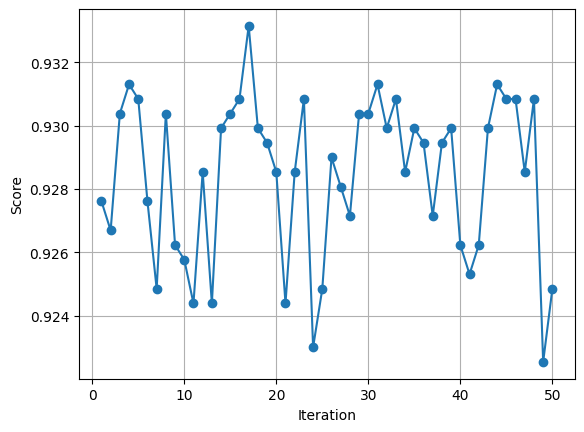

<Figure size 640x480 with 0 Axes>

Currently at Cuckoo Search
[38, 0.4953294691693303, 47, 'entropy', None]
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[45, 0.25965295529286125, 523, 'gini', None]
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[39, 0.3536874177475291, 47, 'gini', None]
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[41, 0.4697112784736025, 46, 'entropy', None]
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[42, 0.43708549174550837, 45, 'entropy', 'log2']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[42, 0.6677456145428671, 48, 'entropy', 'log2']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[44, 0.42285697487712315, 50, 'entropy', None]
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[44, 0.6689209238965844, 47, 'gini', 'sqrt']
Fitting at most 1.0 candidates
Optimization finishe

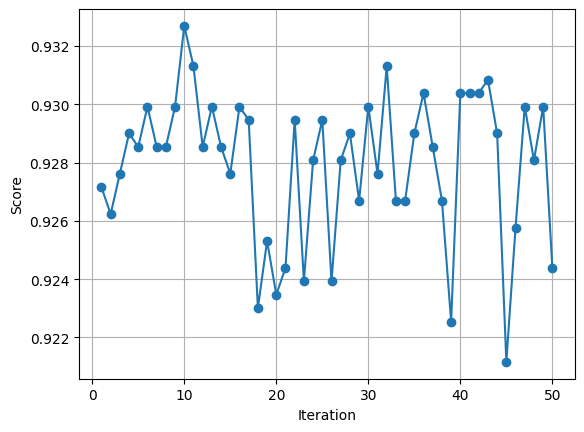

<Figure size 640x480 with 0 Axes>

Currently at Camel Algorithm
[45, 0.8917689509621813, 0.15741050805604714, 0.33951358433762857, 556.3241207828955, 439.25496574370027, -7.857737014738504, 76.33105126957706, 528, 'entropy', 'sqrt']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[29, 0.2467377051902176, 0.9056761446063374, 0.6698120059714505, 340.43479935024084, 864.1309972100481, -42.299384908307466, 97.57636874894732, 536, 'entropy', None]
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[83, 0.3769517731710098, 0.3689814633457428, 0.5497261056577791, 123.09406136530002, 557.3159322079924, -30.941571553040248, 98.4836083645137, 550, 'gini', 'log2']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[84, 0.9134086125420942, 0.12398639036983783, 0.26142207636105796, 588.9075790917148, 489.4912124285041, -42.30435629963133, 93.296077594611, 529, 'entropy', 'sqrt']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates we

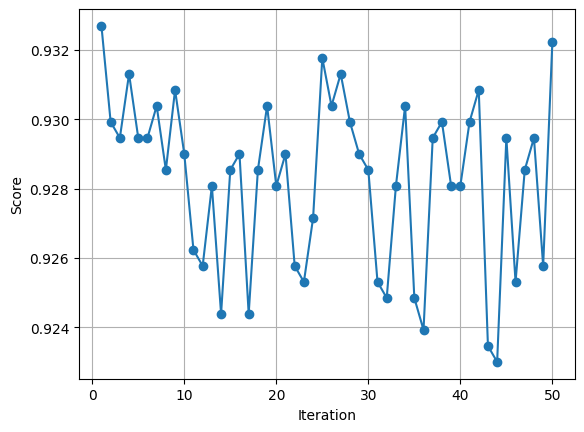

<Figure size 640x480 with 0 Axes>

Currently at Bat
[45, 0.4953294691693303, 0.6002920007053112, 0.15741050805604714, 0.8917689509621813, 9.21422629852615, 78.4827738814337, 528, 'entropy', 'sqrt']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[95, 0.8614281821799779, 0.796477014594362, 0.16222991347347518, 0.12790798540042644, 6.31227604521258, 69.61764669660025, 233, 'entropy', 'sqrt']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[93, 0.4978640123835224, 0.5090871677180451, 0.6405368411366579, 0.9978071365524831, 2.7311981207266167, 72.36074137762624, 231, 'gini', None]
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[28, 0.19172373563054307, 0.2647039138571946, 0.6652693727626408, 0.34930858437150325, 8.610417751508262, 88.6826965509445, 198, 'entropy', None]
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[37, 0.3743900780349997, 0.5345462018375161, 0.6931028571396962, 0.7495520167868096, 

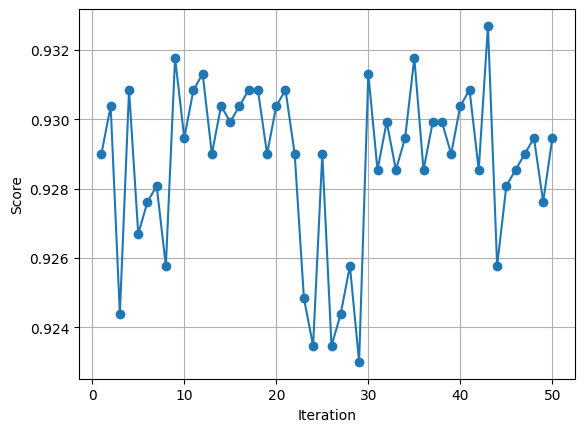

<Figure size 640x480 with 0 Axes>

Currently at Fire Fly
[92, 0.8917689509621813, 75.21115868102953, 0.4953294691693303, 0.8911943611104965, 458, 'gini', 'sqrt']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[51, 0.8958647271396394, 57.02195515335964, 0.28812074272118926, 0.7857829646462213, 223, 'entropy', 'log2']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[94, 0.8756219559119393, 75.81083312931621, 0.3153985157576881, 0.6927513415286395, 456, 'entropy', 'sqrt']
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[98, 0.42227474209848503, 12.56144876187138, 0.47119833498104335, 0.9763147931213135, 596, 'entropy', None]
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[14, 0.46034571602325214, 3.0680888351127975, 0.7459307844687939, 0.2305468237587804, 595, 'gini', None]
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
[99, 0.39732977883606346, 54.265362801727264, 0.

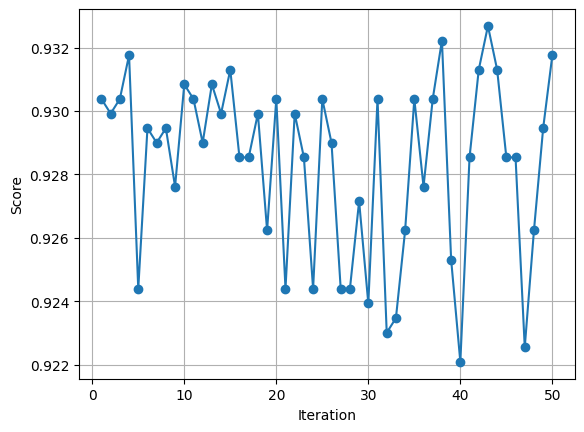

<Figure size 640x480 with 0 Axes>

In [48]:
#def Optimize_and_plot(bounds,curr_mdl_fxn,Algo_name:str,Iters:int):
My_Nia_lst = [4,0,5,2,1]
for i in My_Nia_lst:
    Optimize_and_plot(bounds=NIA_pbounds_lst[i],curr_mdl_fxn=mdl_fxn[i],Algo_name=NIA_Name[i],Iters=50)
    

BASE CASE

In [49]:
os.remove(energy_file)
time.sleep(2)
curr_mdl = RandomForestClassifier()
Start_idx = len(pd.read_csv(energy_file))
curr_mdl.fit(X_train,y_train)
target = curr_mdl.score(X_test,y_test)
End_idx = len(pd.read_csv(energy_file))

Energy_dict = Get_Time_Energy(Start_idx,End_idx)
#{'Time Taken(s)':int(End_idx-Start_idx+1), 'Total Power(J)':0.0, 'CPU(J)':0.0, 'Monitor(J)':0.0, 'Disk(J)':0.0, 'Base(J)':0.0}

Curr_ID = 'BASE-0001'

In [50]:
target

0.9289995389580452

In [51]:
#All results like Accuracy, time taken, Energy, CO2 
Result_df = pd.DataFrame()
col_lst = ['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)', 'Equivalent CO2 Emission (mg)']
for col_name in col_lst:
    Result_df[col_name] = []

#Energy Distribution
Energy_df = pd.DataFrame()
col_lst = ['ID', 'Time Taken(s)', 'Total Power(J)', 'CPU(J)', 'Monitor(J)', 'Disk(J)', 'Base(J)']
for col_name in col_lst:
    Energy_df[col_name] = []


In [52]:

Result_df.loc[len(Result_df)] = [Curr_ID, target, Energy_dict['Time Taken(s)'], Energy_dict['Total Power(J)'], (17.0/72.0)*Energy_dict['Total Power(J)']]
#['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)', 'Equivalent CO2 Emission (mg)']

Energy_df.loc[len(Energy_df)] = [Curr_ID] + list(Energy_dict.values())
#['ID', 'Time Taken(s)', 'Total Power(J)', 'CPU(J)', 'Monitor(J)', 'Disk(J)', 'Base(J)']


In [53]:
Result_df.to_csv(os.path.join(MainResultFolder,'Base.csv')) 
Energy_df.to_csv(os.path.join(Supplementary_result,'Base_Energy_Distribution.csv'))

BASE CASE

function ClickConnect(){
               
console.log("Working"); 
document.querySelector("#comments > span").click() 
}
setInterval(ClickConnect,5000)